Natalie Rehfeld
A6 13.9, 13.20

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import math
import random
import scipy
import statistics
import seaborn as sns
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

**13.19A nickel–titanium alloy is used to make components
for jet turbine aircraft engines. Cracking is a potentially serious problem in the final part because it can
lead to nonrecoverable failure. A test is run at the parts
producer to determine the effect of four factors on
cracks. The four factors are pouring temperature (A),
titanium content (B), heat treatment method (C), and
amount of grain refiner used (D). Two replicates of
a 24 design are run, and the length of crack (in mm
× 10−2
) induced in a sample coupon subjected to a
standard test is measured. The data are shown in
Table 13E.6.**

In [3]:
data=pd.read_csv('drive/MyDrive/Data13_19.csv', sep=',', na_values=".")
data

,a,b,c,d,Rep
0,-1,-1,-1,-1,7.037
1,1,-1,-1,-1,14.707
2,-1,1,-1,-1,11.635
3,1,1,-1,-1,17.273
4,-1,-1,1,-1,10.403
5,1,-1,1,-1,4.368
6,-1,1,1,-1,9.360
7,1,1,1,-1,13.440
8,-1,-1,-1,1,8.561
9,1,-1,-1,1,16.867


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       32 non-null     int64  
 1   b       32 non-null     int64  
 2   c       32 non-null     int64  
 3   d       32 non-null     int64  
 4   Rep     32 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.4 KB


In [5]:
aa=data[['a']].to_numpy()
bb=data[['b']].to_numpy()
cc=data[['c']].to_numpy()
dd=data[['d']].to_numpy()
ab=aa*bb
bc=bb*cc
ac=aa*cc
ad=aa*dd
bd=bb*dd
cd=cc*dd
abc=aa*bb*cc
abd=aa*bb*dd
bcd=bb*cc*dd
acd=aa*cc*dd
abcd=aa*bb*cc*dd

In [6]:
data['ab']=ab
data['bc']=bc
data['ac']=ac
data['ad']=ad
data['bd']=bd
data['cd']=cd
data['abc']=abc
data['abd']=abd
data['acd']=acd
data['bcd']=bcd
data['abcd']=abcd
X=data[['a', 'b', 'c', 'd', 'ab', 'bc', 'ac', 'ad', 'bd', 'cd', 'abc', 'abd', 'bcd', 'acd', 'abcd']]
X = sm.add_constant(X) # adding a constant
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,d,ab,bc,ac,ad,bd,cd,abc,abd,bcd,acd,abcd
0,1.0,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,1
1,1.0,1,-1,-1,-1,-1,1,-1,-1,1,1,1,1,-1,1,-1
2,1.0,-1,1,-1,-1,-1,-1,1,1,-1,1,1,1,1,-1,-1
3,1.0,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1
4,1.0,-1,-1,1,-1,1,-1,-1,1,1,-1,1,-1,1,1,-1
5,1.0,1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1
6,1.0,-1,1,1,-1,-1,1,-1,1,-1,-1,-1,1,-1,1,1
7,1.0,1,1,1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1
8,1.0,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,-1
9,1.0,1,-1,-1,1,-1,1,-1,1,-1,-1,1,-1,1,-1,1


In [7]:
Y=data[['Rep']]
Y

,Rep
0,7.037
1,14.707
2,11.635
3,17.273
4,10.403
5,4.368
6,9.360
7,13.440
8,8.561
9,16.867


In [8]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    Rep   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     469.0
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           3.08e-18
Time:                        23:57:47   Log-Likelihood:                 5.8657
No. Observations:                  32   AIC:                             20.27
Df Residuals:                      16   BIC:                             43.72
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9881      0.050    238.042      0.0

In [9]:
model = ols('Rep ~ C(a) + C(b) + C(c) + C(d) + C(a):C(b) + C(b):C(c) + C(a):C(c) + C(a):C(d) + C(b):C(d) + C(c):C(d) + C(a):C(b):C(d)+ C(a):C(c):C(d) + C(b):C(c):C(d) + C(a):C(b):C(c) + C(a):C(b):C(c):C(d)', data).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,89.954284,1.0,1108.362496,3.323321e-16
C(a),68.169792,1.0,839.947107,2.952038e-15
C(b),26.579180,1.0,327.492645,4.445341e-12
C(c),12.748470,1.0,157.078969,1.093300e-09
C(d),4.200450,1.0,51.755417,2.137006e-06
C(a):C(b),3.314025,1.0,40.833421,8.953357e-06
C(b):C(c),18.763938,1.0,231.197939,6.231238e-11
C(a):C(c),102.252150,1.0,1259.889386,1.207782e-16
C(a):C(d),0.001404,1.0,0.017305,8.969802e-01
C(b):C(d),0.010440,1.0,0.128637,7.245382e-01


In [10]:
eij=model.resid
eij

0     0.3305
1    -0.2560
2    -0.2270
3    -0.2710
4     0.1260
5     0.1350
6     0.0535
7     0.2585
8    -0.1950
9    -0.0925
10    0.1090
11    0.0925
12   -0.2455
13    0.1105
14    0.1275
15    0.3000
16   -0.3305
17    0.2560
18    0.2270
19    0.2710
20   -0.1260
21   -0.1350
22   -0.0535
23   -0.2585
24    0.1950
25    0.0925
26   -0.1090
27   -0.0925
28    0.2455
29   -0.1105
30   -0.1275
31   -0.3000
dtype: float64

In [11]:
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) 
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[6, 19, 14, 9, 26, 7, 20, 24, 15, 0, 5, 31, 10, 27, 17, 22, 11, 12, 18, 1, 23, 8, 2, 29, 28, 30, 16, 3, 25, 13, 21, 4]


**a) Estimate the factor effects. Which factor effects
appear to be large?**

A, B, C, AC, ABC have the largest factor effects. We can tell because the have large coefficients and small p-values.

**b) Conduct an analysis of variance. Do any of the
factors affect cracking? Use a = 0.05.**

Looking at the p-values, a, b, c, d, ab, ac, and abc all have a low p-value that meet a 95% confidence level. 

**c) Write down a regression model that can be used
to predict crack length as a function of the significant main effects and interactions you have
identified in part b**

Y= 1.5094A + 1.9879B - 1.7981C + 0.9789D + 0.9671AB - 2.0039AC + 1.5688ABC

**d) Analyze the residuals from this experiment**

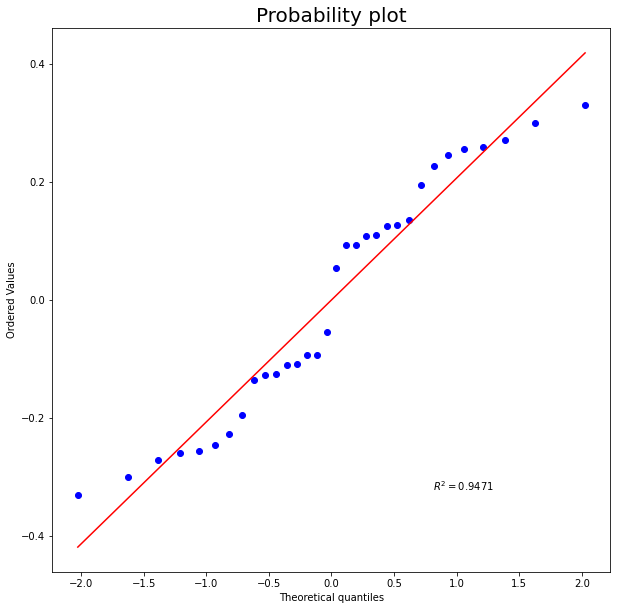

In [12]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot", fontsize= 20)
ax.set

plt.show()

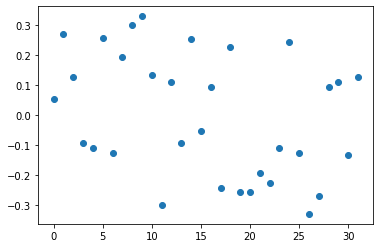

In [13]:
eij=model.resid

x = c 
y = eij[order] 

plt.scatter(x, y)

The scatterplot chart has an even amount of data above and below the 0 line. The probability chart passes the fat pencil test so we can assume a normality in the data. 

**e) Is there an indication that any of the factors affect
the variability in cracking?**

The signifcance of the p-value shows if the factor affects cracking. A negative coefficent means the cracks are small. A positive coefficent means the cracks are larger. The coefficient number tells how big or small. The factors that affect cracking are: a, b, c, d, ab, ac, and abc.

**f) What recommendations would you make regarding process operations? Use interaction and/or
main effect plots to assist in drawing conclusions.**

From looking at the results, I concluded the negative coefficients determine how small the crack is. I recommend using a combination of heat treatment and pouring temperature. These are the two lowest coefficients and would cause the smallest cracks in our jet turbine engines.

**13.20 Continuation of Exercise 13.19. One of the variables in the experiment described in Exercise 13.19,
heat treatment method (C), is a categorical variable.
Assume that the remaining factors are continuous.**

**(a) Write two regression models for predicting crack
length, one for each level of the heat treatment
method variable. What differences, if any, do you
notice in these two equations?**

In [14]:
c_pos = X[(X["c"] == 1)]

In [15]:
data_rep_pos = data[(data["c"] == 1)]

In [16]:
rep_pos =  data_rep_pos["Rep"]

In [17]:
model3 = sm.OLS(rep_pos, c_pos)
res=model3.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    Rep   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     379.0
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           1.91e-09
Time:                        23:57:48   Log-Likelihood:                 4.0445
No. Observations:                  16   AIC:                             7.911
Df Residuals:                       8   BIC:                             14.09
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0950      0.033    153.368      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [18]:
c_neg = X[(X["c"] == -1)]

In [19]:
data_rep_neg = data[(data["c"] == -1)]
data_rep_neg

,a,b,c,d,Rep,ab,bc,ac,ad,bd,cd,abc,abd,acd,bcd,abcd
0,-1,-1,-1,-1,7.037,1,1,1,1,1,1,-1,-1,-1,-1,1
1,1,-1,-1,-1,14.707,-1,1,-1,-1,1,1,1,1,1,-1,-1
2,-1,1,-1,-1,11.635,-1,-1,1,1,-1,1,1,1,-1,1,-1
3,1,1,-1,-1,17.273,1,-1,-1,-1,-1,1,-1,-1,1,1,1
8,-1,-1,-1,1,8.561,1,1,1,-1,-1,-1,-1,1,1,1,-1
9,1,-1,-1,1,16.867,-1,1,-1,1,-1,-1,1,-1,-1,1,1
10,-1,1,-1,1,13.876,-1,-1,1,-1,1,-1,1,-1,1,-1,1
11,1,1,-1,1,19.824,1,-1,-1,1,1,-1,-1,1,-1,-1,-1
16,-1,-1,-1,-1,6.376,1,1,1,1,1,1,-1,-1,-1,-1,1
17,1,-1,-1,-1,15.219,-1,1,-1,-1,1,1,1,1,1,-1,-1


In [20]:
rep_neg =  data_rep_neg["Rep"]

In [21]:
model2 = sm.OLS(rep_neg, c_neg)
res=model2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    Rep   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     436.4
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           1.09e-09
Time:                        23:57:48   Log-Likelihood:                 1.9570
No. Observations:                  16   AIC:                             12.09
Df Residuals:                       8   BIC:                             18.27
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8931      0.038    182.115      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In comparing the two models, I can see there are some differences between heat treatments imoact on the turbine engines. The positive model shows heat treatment will have the most significant impact on the cracks in the turbine engines.

**(b) Generate appropriate response surface contour
plots for the two regression models in part (a).**

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [23]:
def f(X, Y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [24]:
x = rep_neg
y = data_rep_neg

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

TypeError: ignored

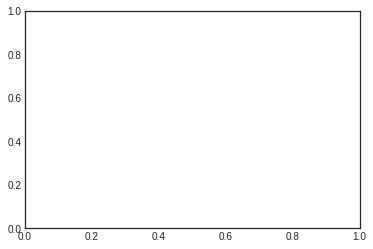

In [25]:
plt.contour(X, Y, Z, colors='black');

**(c) What set of conditions would you recommend
for the factors A, B, and D if you use heat treatment method C = +?**

I would apply pouring temperature (A). This is the only coefficient that is negative for factors A, B, and D. It would cause the smallest cracks

**(d) Repeat part (c), assuming that you wish to use
heat treatment method C = −.**

Using a combination of AB would give the best results